<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Extrema-unter-Nebenbedingungen" data-toc-modified-id="Extrema-unter-Nebenbedingungen-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Extrema unter Nebenbedingungen</a></span><ul class="toc-item"><li><span><a href="#Notwendige-Bedingungen-erster-Ordnung" data-toc-modified-id="Notwendige-Bedingungen-erster-Ordnung-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Notwendige Bedingungen erster Ordnung</a></span></li><li><span><a href="#Notwendige-Bedingungen-zweiter-Ordnung" data-toc-modified-id="Notwendige-Bedingungen-zweiter-Ordnung-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Notwendige Bedingungen zweiter Ordnung</a></span></li><li><span><a href="#Hinreichende-Bedingungen-zweiter-Ordnung" data-toc-modified-id="Hinreichende-Bedingungen-zweiter-Ordnung-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Hinreichende Bedingungen zweiter Ordnung</a></span></li></ul></li></ul></div>

In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()
#%matplotlib qt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
x = symbols('x:2')
mu = symbols('mu')

# Lektion 14
## Extrema unter Nebenbedingungen

__Problemstellung__

Wir wollen für hinreichend oft differenzierbare reellwertige Funktionen $f:\mathbb{R^n} \to \mathbb{R}$ und $g_j:\mathbb{R^n} \to \mathbb{R}$, $j = 1,\dots,m$, das Minimierungsproblem

\begin{equation}
\qquad \min_{x} f(x) \qquad s.d. \quad g_j(x) = 0 \mbox{ für } j = 1,\dots,m \qquad \qquad (*)
\end{equation}

lösen.


__Definition__

$x^*$ ist eine lokale Lösung von $(*)$, falls $g_j(x^*)=0$ für alle $j = 1,\dots,m$ und falls es $\epsilon > 0$ gibt, mit

$$
    f(x^*) \le f(x) \quad \mbox{für alle } \ x \mbox{ mit } \ \|x-x^*\| < \epsilon \ \mbox{ und } \ g_j(x)=0 \quad j = 1,\dots,m.
$$

### Notwendige Bedingungen erster Ordnung
__Definition__ (Lagrangefunktion)
Für $\mu = (\mu_1, \dots, \mu_m) \in \mathbb{R}^m$ ist die Lagrangefunktion zu $(*)$:
$$
    \mathcal{L}(x,\mu) = f(x) - \sum_{j=1}^m \mu_j g_j(x)
$$

In der Analysis 2 wird folgender Satz bewiesen:

__Satz__ (Notwendige Bedingungen erster Ordnung)

Ist $x^*$ eine lokale Lösung von $(*)$ und ist die Menge $\{ \nabla_x g_j(x^*), j=1,\dots,m\}$ 
linear unabhängig, dann gibt es $\mu^*_j\in \mathbb{R}$, $j=1\dots,m$ so, dass
\begin{align}
\nabla_x \mathcal{L}(x^*,\mu^*) &= 0 
\\
 g_j(x^*) &= 0  \ \forall \ j=1,\dots,m
\end{align}

kurz:
$$
\nabla \mathcal{L}(x^*,\mu^*) = 0
$$

#### Beispiel

In [2]:
g = x[0]**4+x[1]**4-1 # Fall m = 1
f = x[0]+x[1]

gn = lambdify(x, g) 
fn = lambdify(x, f)
gn(1, 2)

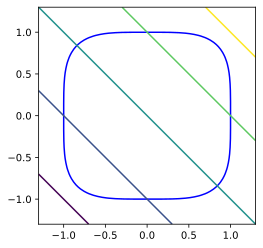

In [3]:
x0, x1 = np.linspace(-1.3, 1.3, 100), np.linspace(-1.3, 1.3, 100)
X0, X1 = np.meshgrid(x0, x1)
fig = plt.figure()
ax = fig.gca()
pg = ax.contour(X0, X1, gn(X0, X1), 0, colors='blue')
ax.contour(X0, X1, fn(X0, X1), [-2, -1, 0, 1, 2])
ax.set_aspect('equal')

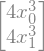

In [4]:
grad_g = Matrix(2,1,[g.diff(var) for var in x])
grad_f = Matrix(2,1,[f.diff(var) for var in x])
grad_g

In [5]:
grad_gn = lambdify(x,grad_g)
grad_fn = lambdify(x,grad_f)

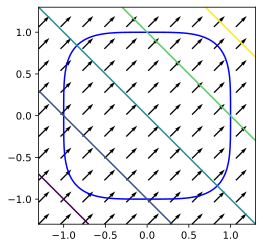

In [6]:
fig = plt.figure()
ax = fig.gca()
pg = ax.contour(X0, X1, gn(X0, X1), 0, colors='blue') 
ax.contour(X0, X1, fn(X0, X1), [-2, -1, 0, 1, 2])
GF = grad_fn(X0[::10, ::10], X1[::10, ::10])
ax.quiver(X0[::10, ::10], X1[::10, ::10], GF[0], GF[1], angles='xy', scale=20)
ax.set_aspect('equal')

In [7]:
# 305 Punkte auf der g(x)=0 Linie
(pg.allsegs[1][0]).shape

In [8]:
# Punkte auf der g(x)=0 Linie
SG = np.array((pg.allsegs)[1][0])
X0G, X1G = SG[::20, 0], SG[::20, 1]
X0G**4+X1G**4

array([0.99986689, 0.99995981, 0.99950674, 0.99898692, 0.99903615,
       0.99918032, 0.99900014, 0.99898292, 0.99945686, 0.99959936,
       0.99897277, 0.99896993, 0.99921457, 0.99960604, 0.99898485,
       0.99904591])

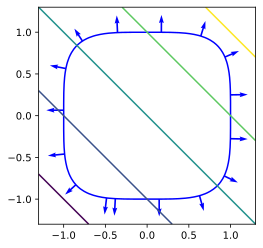

In [9]:
fig = plt.figure()
ax = fig.gca()
pg = ax.contour(X0, X1, gn(X0, X1), 0, colors='blue')
ax.contour(X0, X1, fn(X0, X1), [-2, -1, 0, 1, 2])
GG = grad_gn(X0G, X1G)
ax.quiver(X0G, X1G, GG[0], GG[1], angles='xy', scale=50, color='blue')
ax.set_aspect('equal')

In [10]:
# Gradient bzgl. x der Lagrangefunktion
GLF = grad_f-mu*grad_g

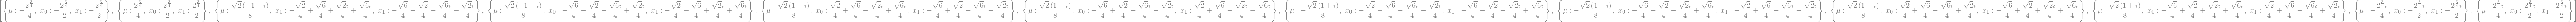

In [11]:
# Diese Punkte erfüllen die notwendingen Bedingungen
M = solve([GLF, g])
M

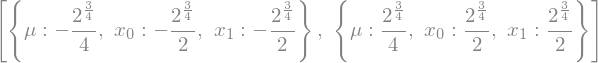

In [12]:
# Wir suchen uns die reellen Lösungen raus
rsol = []
for sol in M:
    if (im(sol[mu])==0) & (im(sol[x[0]])==0) & (im(sol[x[1]])==0):
        rsol.append(sol)
rsol

In [13]:
g.subs(rsol[0]) # Probe

In [14]:
g.subs(rsol[1]) # Probe

In der Optimierung werden folgende Sätze bewiesen:

### Notwendige Bedingungen zweiter Ordnung 


__Satz__ (Zweite Ordnung notwendige Bedingungen)

Ist $x^*$ eine lokale Lösung von (∗) und ist die Menge $\{\nabla_x g_j(x^*), j=1,\dots,m\}$ linear unabhängig, dann gilt

$$
 s^T \nabla_{xx} \mathcal{L}(x^*,\mu^*) s \ge 0 \quad \forall s \in \{ s \in \mathbb{R}^n : s^T \nabla_x g_j(x^*) = 0 \ \forall j = 1,\dots,m \}.
$$


### Hinreichende Bedingungen zweiter Ordnung

__Satz__ (Zweite Ordnung hinreichende Bedingungen)

Gibt es für $x^*$ mit $g_j(x^*) =0 $ für $j=1,\dots,m$ Lagrangemultiplikatoren  $\mu^*_j \in \mathbb{R}$, $j=1,\dot,m$ so, dass 
$\nabla_x \mathcal{L}(x^*,\mu^*) = 0$ und ist

$$
 s^T \nabla_{xx} \mathcal{L}(x^*,\mu^*) s > 0 \quad \forall s \in \{ s : s^T \nabla_x g_j(x^*) = 0 \ \forall j = 1,\dots,m , s \not = 0\},
$$

so ist $x^*$ eine lokale Lösung von $(*)$.

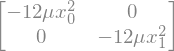

In [15]:
H = Matrix(2, 2,[ (f-mu*g).diff(x0,x1) for x0 in x for x1 in x])
H

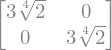

In [16]:
H.subs(rsol[0]) # diese Matrix ist positiv definit

Also haben wir hier ein Minimum (Achtung: Für das Minimum reicht es, dass nur ein Teil der Hessematrix positiv definit ist, siehe obiger Satz)

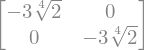

In [17]:
H.subs(rsol[1])

In [18]:
xx0=rsol[0][x[0]]
xx1=rsol[0][x[1]]

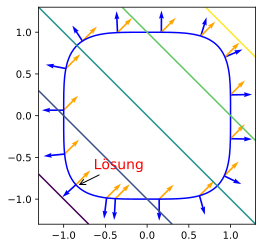

In [19]:
fig = plt.figure()
ax = fig.gca()
pg = ax.contour(X0, X1, gn(X0, X1), 0, colors='blue')

ax.contour(X0, X1, fn(X0, X1), [-2, -1, 0, 1, 2])
GG = grad_gn(X0G, X1G)
GF = grad_fn(X0G, X1G)
ax.quiver(X0G, X1G, GG[0], GG[1], angles='xy', scale=40, color='blue')
ax.quiver(X0G, X1G, GF[0], GF[1], angles='xy', scale=15, color='orange')
ax.set_aspect('equal')
ax.annotate('Lösung', (xx0, xx1), (xx0+.2, xx1+.2),\
            arrowprops={'arrowstyle':'->'}, color='red', fontsize=14);
 